In [35]:
# COVID

In [36]:
import sys
#!{sys.executable} -m pip install plotly-express


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

%matplotlib inline 
sns.set_style("darkgrid")


In [57]:
df = pd.read_csv('work/covid19-5ed77dfe94aa409eb8c10d54be0ea2f2.csv')
    

In [39]:
df.columns

Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths', 'is_last',
       'estimated_population_2019', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate'],
      dtype='object')

In [40]:
df.shape

(21918, 11)

In [41]:
df['date']= pd.to_datetime(df['date']) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21918 entries, 0 to 21917
Data columns (total 11 columns):
date                              21918 non-null datetime64[ns]
state                             21918 non-null object
city                              20933 non-null object
place_type                        21918 non-null object
confirmed                         21918 non-null int64
deaths                            21918 non-null int64
is_last                           21918 non-null bool
estimated_population_2019         21548 non-null float64
city_ibge_code                    21548 non-null float64
confirmed_per_100k_inhabitants    21223 non-null float64
death_rate                        4916 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
df['state'].value_counts()

In [58]:
df['state'].unique()

array(['AL', 'BA', 'CE', 'MG', 'PB', 'PR', 'AC', 'AM', 'AP', 'DF', 'GO',
       'MA', 'MS', 'MT', 'PA', 'PE', 'PI', 'RJ', 'RN', 'RO', 'RR', 'RS',
       'SC', 'SE', 'SP', 'TO', 'ES'], dtype=object)

In [43]:
dados_estado = df.loc[ (df['state'] == "PE") & (df['city']=='Recife') ]
dados_estado.shape

(36, 11)

In [44]:
dados_estado.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
1149,2020-04-19,PE,Recife,city,1399,100,True,1645727.0,2611606.0,85.00802,0.0715
2563,2020-04-18,PE,Recife,city,1255,94,False,1645727.0,2611606.0,76.25809,0.0749
3922,2020-04-17,PE,Recife,city,1136,85,False,1645727.0,2611606.0,69.02724,0.0748
5214,2020-04-16,PE,Recife,city,958,70,False,1645727.0,2611606.0,58.21136,0.0731
6447,2020-04-15,PE,Recife,city,857,62,False,1645727.0,2611606.0,52.07425,0.0723


In [45]:
dados_estado_plot = dados_estado[['date','confirmed'	]].sort_values(by=['date' ], ascending=True)
dados_estado_plot.reset_index(drop=True, inplace=True)

dados_estado_plot.head()
#dados_estado_plot.plot(kind='bar')

    #.sort_values(by=['date' ], ascending=True)

,date,confirmed
0,2020-03-12,2
1,2020-03-13,2
2,2020-03-14,6
3,2020-03-15,7
4,2020-03-17,13


In [46]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size


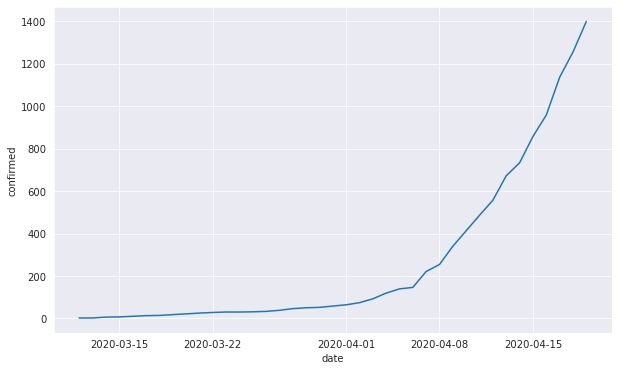

In [47]:
sns.lineplot(x='date',y='confirmed', data=dados_estado_plot)

In [48]:
p = px.histogram(dados_estado_plot, 
                 x ='confirmed', 
                 nbins = 15, 
                 title ='Price distribution')
p.update_xaxes(title='Price')
p.update_yaxes(title='No.oflistings')
p.show()

In [49]:
df2 = px.data.iris()
fig = px.density_contour(df2, x="sepal_width", y="sepal_length")
fig.show()
